In [1]:
import pandas as pd
import os

# Images folder

In [2]:
# Number of images in the folder
image_folder = "../data/archive/images/images"
image_count = len([name for name in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, name))])
print(f" Number of images in the folder: {image_count}")

 Number of images in the folder: 68013


# Attribute data

In [3]:
attrib_data = pd.read_csv("../data/archive/attribute_data.csv")

In [4]:
attrib_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   cod_modelo_color  151112 non-null  object
 1   attribute_name    151112 non-null  object
 2   cod_value         151112 non-null  int64 
 3   des_value         151112 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.6+ MB


In [5]:
#attrib_data = attrib_data[~attrib_data['cod_modelo_color'].isin(['83_1148656', "86_1208032", "88_49720742"])]

In [6]:
attrib_data.head()
attrib_data.info()
attrib_data.describe()

# Number of nulls
print(f" Number of nulls in the data: {attrib_data.isnull().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   cod_modelo_color  151112 non-null  object
 1   attribute_name    151112 non-null  object
 2   cod_value         151112 non-null  int64 
 3   des_value         151112 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.6+ MB
 Number of nulls in the data: 0


In [7]:
# Number of unique pieces of clothing
print(f" Number of unique pieces of clothing: {attrib_data['cod_modelo_color'].nunique()}")

 Number of unique pieces of clothing: 33443


# Product data

In [8]:
product_data = pd.read_csv("../data/archive/product_data.csv")

# check the number of rows
print(f" Number of rows in the product data: {product_data.shape[0]}")

 Number of rows in the product data: 61484


In [9]:
product_data = product_data[~product_data['des_filename'].isin(['83_1148656_17026323-07_B.jpg', "86_1208032_47001267-15_.jpg", "88_49720742_67044470-56_.jpg"])]
print(f" Number of rows in the product data: {product_data.shape[0]}")

# check if we deleted the deffective rows
if "86_1208032_47001267-15_.jpg" in product_data['des_filename']:
    print("The row is still there")
else:
    print("The row is deleted")


 Number of rows in the product data: 61482
The row is deleted


In [10]:
product_data.info()
product_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 61482 entries, 0 to 61483
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               61482 non-null  object
 1   cod_color                      61364 non-null  object
 2   des_sex                        61482 non-null  object
 3   des_age                        61482 non-null  object
 4   des_line                       61482 non-null  object
 5   des_fabric                     61482 non-null  object
 6   des_product_category           61482 non-null  object
 7   des_product_aggregated_family  61482 non-null  object
 8   des_product_family             61482 non-null  object
 9   des_product_type               61482 non-null  object
 10  des_filename                   61482 non-null  object
 11  des_color                      61364 non-null  object
dtypes: object(12)
memory usage: 6.1+ MB


,cod_modelo_color,cod_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,des_color
count,61482,61364,61482,61482,61482,61482,61482,61482,61482,61482,61482,61364
unique,33443,121,3,5,3,7,5,11,26,47,61482,121
top,86_1212312,99,Female,Adult,WOMAN,WOVEN,Tops,T-shirts,T-shirt,T-Shirt,83_1144802_17097729-99_B.jpg,NEGRO
freq,2,9755,43127,45904,33617,24335,28824,10290,9165,9165,1,9755


In [11]:
test_images = 68013 - 61484
print(f" Number of test images: {test_images}")

 Number of test images: 6529


# Let's prove it

In [12]:
test_data = pd.read_csv("../data/archive/test_data.csv")

In [13]:
test_data.info()

# Count the unique values in the test data
print(f" Number of unique values in the test data: {test_data['cod_modelo_color'].nunique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71819 entries, 0 to 71818
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               71819 non-null  object
 1   des_filename                   71819 non-null  object
 2   cod_color                      71786 non-null  object
 3   des_color                      71786 non-null  object
 4   des_sex                        71819 non-null  object
 5   des_age                        71819 non-null  object
 6   des_line                       71819 non-null  object
 7   des_fabric                     71819 non-null  object
 8   des_product_category           71819 non-null  object
 9   des_product_aggregated_family  71819 non-null  object
 10  des_product_family             71819 non-null  object
 11  des_product_type               71819 non-null  object
 12  attribute_name                 71819 non-null  object
 13  t

In [14]:
# We print the unique values of the columns
for column in product_data.columns:
    print(f" {column}: {product_data[column].nunique()}")

 cod_modelo_color: 33443
 cod_color: 121
 des_sex: 3
 des_age: 5
 des_line: 3
 des_fabric: 7
 des_product_category: 5
 des_product_aggregated_family: 11
 des_product_family: 26
 des_product_type: 47
 des_filename: 61482
 des_color: 121


# New data

In [15]:
# Now we make a join between the two datasets using the column 'cod_modelo_color'
merged_data = pd.merge(attrib_data, product_data, on='cod_modelo_color')
merged_data.head()

,cod_modelo_color,attribute_name,cod_value,des_value,cod_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,des_filename,des_color
0,85_1202950,silhouette_type,37,Slim,99,Female,Adult,WOMAN,TRICOT,Tops,Tops,Tops,Top,85_1202950_37036315-99_B.jpg,NEGRO
1,85_1202950,silhouette_type,37,Slim,99,Female,Adult,WOMAN,TRICOT,Tops,Tops,Tops,Top,85_1202950_37036315-99_.jpg,NEGRO
2,86_1217677,silhouette_type,27,Oversize,95,Male,Teen,KIDS,CIRCULAR,Tops,T-shirts,T-shirt,T-Shirt,86_1217677_47024408-95_.jpg,ANTRACITA
3,86_1217677,silhouette_type,27,Oversize,95,Male,Teen,KIDS,CIRCULAR,Tops,T-shirts,T-shirt,T-Shirt,86_1217677_47024408-95_B.jpg,ANTRACITA
4,84_1168477,silhouette_type,37,Slim,99,Female,Adult,WOMAN,TRICOT,Tops,Sweaters and Cardigans,Sweater,Sweater,84_1168477_27075766-99_B.jpg,NEGRO


In [16]:
# now we do a group by using attribute name
grouped_data = merged_data.groupby('attribute_name').size().reset_index(name='count')
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 6 to 0
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   attribute_name  11 non-null     object
 1   count           11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 264.0+ bytes


In [17]:
# another way to do the group by but using the 'cod_modelo_color' column
grouped_data = merged_data.groupby('cod_modelo_color').size().reset_index(name='count')
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data.tail()

,cod_modelo_color,count
492,81_1054583,1
494,81_1054607,1
501,81_1054737,1
502,81_1054816,1
32621,86_1228411,1


<Axes: ylabel='Frequency'>

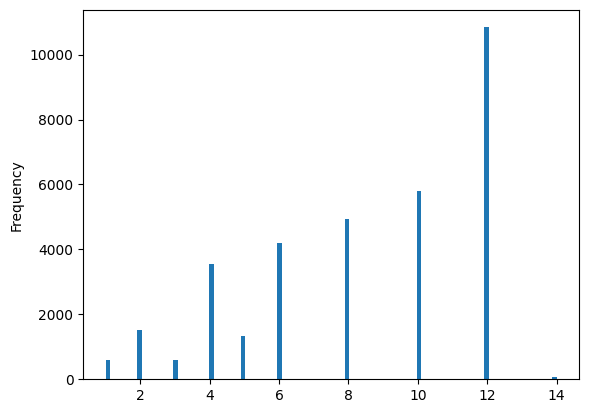

In [18]:
# Now we do a plot to see the distribution of the grouped data
grouped_data['count'].plot(kind='hist', bins=100)

# Create the training set

In [19]:
attrib_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   cod_modelo_color  151112 non-null  object
 1   attribute_name    151112 non-null  object
 2   cod_value         151112 non-null  int64 
 3   des_value         151112 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.6+ MB


In [20]:
attrib_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   cod_modelo_color  151112 non-null  object
 1   attribute_name    151112 non-null  object
 2   cod_value         151112 non-null  int64 
 3   des_value         151112 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.6+ MB


In [21]:
attrib_data_pivot = attrib_data.pivot(index='cod_modelo_color', columns='attribute_name', values='des_value')
attrib_data_pivot.reset_index(inplace=True)

attrib_data_pivot.columns.name = None
attrib_data_pivot.columns = ['cod_modelo_color'] + [f'{col}' for col in attrib_data_pivot.columns if col != 'cod_modelo_color']

# Reemplazar NaNs por 'INVALID'
attrib_data_pivot.fillna('INVALID', inplace=True)

print("\nDataFrame transformado con 'INVALID':")
attrib_data_pivot.head()


DataFrame transformado con 'INVALID':


,cod_modelo_color,cane_height_type,closure_placement,heel_shape_type,knit_structure,length_type,neck_lapel_type,silhouette_type,sleeve_length_type,toecap_type,waist_type,woven_structure
0,81_1034451,INVALID,INVALID,INVALID,INVALID,INVALID,Hawaiano/Bowling,Regular,Corta,INVALID,INVALID,INVALID
1,81_1034525,INVALID,INVALID,INVALID,INVALID,INVALID,Hawaiano/Bowling,Regular,Corta,INVALID,INVALID,INVALID
2,81_1035318,INVALID,INVALID,INVALID,INVALID,Largo,INVALID,INVALID,INVALID,INVALID,INVALID,INVALID
3,81_1035321,INVALID,INVALID,INVALID,INVALID,Largo,INVALID,INVALID,INVALID,INVALID,INVALID,INVALID
4,81_1035361,INVALID,INVALID,INVALID,INVALID,Largo,Capucha,INVALID,INVALID,INVALID,INVALID,INVALID


In [22]:
# Verificar IDs sin correspondencia
ids_sin_correspondencia = product_data[~product_data['cod_modelo_color'].isin(attrib_data_pivot['cod_modelo_color'])]['cod_modelo_color'].unique()
if len(ids_sin_correspondencia) > 0:
    print(f"Advertencia: Las siguientes IDs en df_features no tienen correspondencia en df_labels: {ids_sin_correspondencia}")
else:
    print("Todas las IDs en df_features tienen correspondencia en df_labels.")

Todas las IDs en df_features tienen correspondencia en df_labels.


In [23]:
df_combined = pd.merge(product_data, attrib_data_pivot, on='cod_modelo_color', how='inner')
df_combined.head()

,cod_modelo_color,cod_color,des_sex,des_age,des_line,des_fabric,des_product_category,des_product_aggregated_family,des_product_family,des_product_type,...,closure_placement,heel_shape_type,knit_structure,length_type,neck_lapel_type,silhouette_type,sleeve_length_type,toecap_type,waist_type,woven_structure
0,83_1124642,82,Female,Kids,KIDS,TRICOT,Tops,Sweaters and Cardigans,Sweater,Sweater,...,Cuello,INVALID,Punto Fino,Standard,Redondo,Recto,Larga,INVALID,INVALID,INVALID
1,86_1215223,01,Female,Kids,KIDS,WOVEN,"Dresses, jumpsuits and Complete set",Dresses and jumpsuits,Dresses,Dress,...,Cierre Trasero,INVALID,INVALID,Largo,Caja,Evase,Corta,INVALID,INVALID,Ligero
2,84_1167695,70,Female,Kids,KIDS,CIRCULAR,Tops,T-shirts,T-shirt,T-Shirt,...,INVALID,INVALID,INVALID,Standard,Redondo,Recto,Corta,INVALID,INVALID,Ligero
3,82_1108473,01,Female,Teen,KIDS,JEANS,Bottoms,Jeans,Jeans,Jeans,...,INVALID,INVALID,INVALID,Largo,INVALID,Skinny,INVALID,INVALID,High Waist,Medio
4,83_1137778,37,Male,Adult,MAN,CIRCULAR,Tops,Sweaters and Cardigans,Sweatshirts,Sweatshirt,...,Sin cierre,INVALID,INVALID,Standard,Redondo,Regular,Larga,INVALID,INVALID,Ligero


In [24]:
# Suponiendo que las columnas de etiquetas en df_labels son 'label1', 'label2', ..., 'label11'
columnas_labels = ['cane_height_type', 'closure_placement', 'heel_shape_type', 'knit_structure', 'length_type', 'neck_lapel_type', 'silhouette_type', 'sleeve_length_type', 'toecap_type', 'waist_type', 'woven_structure']

# DataFrame de características
df_features_final = df_combined.drop(columns=columnas_labels)

# DataFrame de etiquetas
df_labels_final = df_combined[['cod_modelo_color'] + columnas_labels]

In [25]:
# save_path = "../flores" 
# df_features_final.to_csv(os.path.join(save_path, "df_labels_final.csv"), index=False)

In [26]:
df_features_final.info()
df_labels_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61482 entries, 0 to 61481
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               61482 non-null  object
 1   cod_color                      61364 non-null  object
 2   des_sex                        61482 non-null  object
 3   des_age                        61482 non-null  object
 4   des_line                       61482 non-null  object
 5   des_fabric                     61482 non-null  object
 6   des_product_category           61482 non-null  object
 7   des_product_aggregated_family  61482 non-null  object
 8   des_product_family             61482 non-null  object
 9   des_product_type               61482 non-null  object
 10  des_filename                   61482 non-null  object
 11  des_color                      61364 non-null  object
dtypes: object(12)
memory usage: 5.6+ MB
<class 'pandas.core.fram

In [27]:
df_labels_final.columns

Index(['cod_modelo_color', 'cane_height_type', 'closure_placement',
       'heel_shape_type', 'knit_structure', 'length_type', 'neck_lapel_type',
       'silhouette_type', 'sleeve_length_type', 'toecap_type', 'waist_type',
       'woven_structure'],
      dtype='object')

In [28]:
# We sort them equally
df_features_final.sort_values(by='cod_modelo_color', inplace=True)
df_labels_final.sort_values(by='cod_modelo_color', inplace=True)

# We delete the column 'cod_modelo_color'
df_features_final.drop(columns='cod_modelo_color', inplace=True)
df_labels_final.drop(columns='cod_modelo_color', inplace=True)

# We delete the feature cod_color
df_features_final.drop(columns='cod_color', inplace=True)

# We delete des_product_aggregated_family
df_features_final.drop(columns='des_product_aggregated_family', inplace=True)

save_path = "../data"

# We save the data
df_features_final.to_csv(os.path.join(save_path, "x_full.csv"), index=False)
df_labels_final.to_csv(os.path.join(save_path, "y_full.csv"), index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_13916\2522544436.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels_final.sort_values(by='cod_modelo_color', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_13916\2522544436.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels_final.drop(columns='cod_modelo_color', inplace=True)


In [29]:
# We ensure we havent lost any data]}')


# Visulization

In [30]:
image_name = "81_1034451.jpg"

# Let's extract y_train

In [31]:
test_data = pd.read_csv("../data/archive/test_data.csv")

# we delete cod_color
test_data.drop(columns='cod_color', inplace=True)

# we delete des_product_aggregated_family
test_data.drop(columns='des_product_aggregated_family', inplace=True)

# we delete the column cod_modelo_color
test_data.drop(columns='cod_modelo_color', inplace=True)

# we delete test_id

In [32]:
# we save the test data
test_data.to_csv(os.path.join(save_path, "x_test.csv"), index=False)

In [33]:
def replace_missing_labels(train, test):
    for column in train.columns:
        if train[column].dtype == 'object' or train[column].dtype.name == 'category':
            # Calcular la moda de la columna del train
            most_frequent_label = train[column].mode()[0]
            
            # Encontrar valores únicos en cada conjunto
            train_values = set(train[column].unique())
            test_values = set(test[column].unique())
            
            # Identificar etiquetas del test que no están en el train
            missing_labels = test_values - train_values
            
            # Reemplazar etiquetas faltantes en el test con la moda del train
            test[column] = test[column].replace(list(missing_labels), most_frequent_label)
    return test



# Supongamos que train y test son tus DataFrames
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

# Aplicar la función
test_updated = replace_missing_labels(df_features_final, test_data)

# We do a stip of the 'des_color' column in test

et = df_features_final['des_color'].mode()[0]
print(test_updated['des_color'].unique())

test_updated['des_color'] = test_updated['des_color'].replace(test_updated['des_color'].unique()[-6], et)
dd = df_features_final.columns
print(dd)

# We remove the columns that are not in the test data
dd = [col for col in dd if col not in ['des_filename']]

for col in dd:
    a = df_features_final[col].unique()
    b = test_updated[col].unique()
    for category in b:
        if category not in a:
            print(f" {col} has a new category: {category}")
    print("")

# Save the updated test data
test_updated.to_csv(os.path.join(save_path, "x_test.csv"), index=False)

['NEGRO' 'BLANCO' 'OFFWHITE' 'MALVA' 'NAVY' 'TEJANO MEDIO' 'BEIGE' 'VERDE'
 'KHAKI' 'ROSA PASTEL' 'TEJANO SOFT' 'ROSA' 'TAUPE' 'TABACO'
 'VERDE PASTEL' 'ROJO' 'MARRON' 'CRUDO' 'MISTERIO' 'ARENA' 'CALDERO'
 'BURDEOS' 'FRESA' 'CELESTE' 'AZUL' 'AGUA' 'TERRACOTA' 'AMARILLO' 'MARINO'
 'CAMEL' 'CHOCOLATE' 'GRIS MEDIO VIGORE' 'TEJANO OSCURO' 'FUCSIA'
 'TEJANO CLARO' 'TEJANO GRIS' 'TOPO' 'ANTRACITA' 'DIRTY' 'PETROLEO'
 'MORADO' 'INDIGO' 'DIRTY CLARO' 'TEJANO NEGRO' 'GRANATE' 'MUSGO' 'SALMON'
 'ROSA PALO' 'AZUL NOCHE' 'GRIS' 'VAINILLA' 'ROSA LIGHT' 'PIEDRA'
 'DIRTY OSCURO' 'CORAL' 'GRIS OSCURO VIGORE' 'OLIVA' 'PORCELANA' 'PLATA'
 'TINTA' 'CHICLE' 'BLUEBLACK' 'HIELO' 'CARAMELO' 'LIMA' 'NARANJA' 'ORO'
 'OCRE' 'ELECTRICO' 'BLEACH' 'TEJANO GRIS OSCURO' 'CUERO' 'DARK CAZA'
 'VINO' 'GRIS CLARO VIGORE' 'LAVANDA' 'ASFALTO' 'AMARILLO PASTEL' 'NUDE'
 'BOTELLA' 'MOSTAZA' 'PERLA' 'VIOLETA' 'CANELA' 'MANDARINA'
 'TESTA DI MORO' 'VISON' 'CENIZA' 'NARANJA PASTEL' 'POMELO' 'LILA' 'MENTA'
 'CEREZA' 'ROJO VALENT

# Let's see if the are any categories in test that do not appear in train

In [34]:
# Let's see if the are any categories in test that do not appear in train

# Unique categories in train
unique_categories_train = df_features_final.nunique()
print(f'unique_categories_train: {unique_categories_train}')

unique_categories_test = test_data.nunique()
print(f'unique_categories_test' + str(unique_categories_test))

unique_categories_train: des_sex                     3
des_age                     5
des_line                    3
des_fabric                  7
des_product_category        5
des_product_family         26
des_product_type           47
des_filename            61482
des_color                 121
dtype: int64
unique_categories_testdes_filename                1
des_color                 111
des_sex                     3
des_age                     5
des_line                    3
des_fabric                  7
des_product_category        5
des_product_family         26
des_product_type           45
attribute_name             11
test_id                 71819
dtype: int64


In [35]:
# des color has 1 more category in test than in train
# we will check which one is the new category
categories_train = df_features_final['des_age'].unique()
categories_test = test_data['des_age'].unique()

new_category = [category for category in categories_test if category not in categories_train]
new_category

[]

In [36]:
categories_test

array(['Adult', 'Kids', 'Baby', 'Newborn', 'Teen'], dtype=object)

In [37]:
categories_train = df_features_final['des_color'].unique()
print(f'categories_train: {categories_train}')

categories_train: ['NEGRO' 'MARRON' 'CAMEL' 'MARINO' 'KHAKI' 'COGNAC' 'NAVY' 'GRIS' 'TINTA'
 'CRUDO' 'PETROLEO' 'BEIGE' 'PIEDRA' 'BLANCO' 'AZUL' 'ROSA PASTEL'
 'GRIS MEDIO VIGORE' 'CELESTE' 'GRIS CLARO VIGORE' 'GRIS OSCURO VIGORE'
 'TAUPE' 'VERDE' 'CAZA' 'AGUA' 'MOSTAZA' 'VERDE PASTEL' 'SALMON'
 'OFFWHITE' 'TERRACOTA' 'GRANATE' 'ARENA' 'FUCSIA' 'ROJO' 'NARANJA' 'OCRE'
 'TABACO' 'INDIGO' 'BURDEOS' 'TEJANO OSCURO' 'TEJANO NEGRO' 'TEJANO MEDIO'
 'BLEACH' 'TEJANO CLARO' 'BLUEBLACK' 'GREEN CAST' 'TEJANO GRIS' 'ORO'
 'TEJANO GRIS OSCURO' 'BOTELLA' 'NARANJA FLUOR' 'AMARILLO FLUOR'
 'PORCELANA' 'LIMA' 'CEREZA' 'CUERO' 'DIRTY OSCURO' 'TEJANO SOFT'
 'MANZANA' 'HIELO' 'NUDE' 'ANTRACITA' 'ROSA' 'AMARILLO' 'COFFEE' 'MUSGO'
 'AMARILLO PASTEL' 'CALDERO' 'ROSA LIGHT' nan 'ESMERALDA' 'CHOCOLATE'
 'PLATA' 'DARK CAZA' 'PERLA' 'POMELO' 'LILA' 'VINO' 'OLIVA' 'MALVA'
 'CARAMELO' 'VISON' 'TOPO' 'ROSA PALO' 'ASFALTO' 'TEJANO GRIS CLARO'
 'LAVANDA' 'AZUL NOCHE' 'ELECTRICO' 'CANELA' 'GERANIO' 'PEACH' 'COBRE'
 '

In [38]:
new_categories = [category for category in categories_test if category not in categories_train]

In [39]:
new_categories

['Adult', 'Kids', 'Baby', 'Newborn', 'Teen']

In [40]:
dd = df_features_final.columns
print(dd)

# We remove the columns that are not in the test data
dd = [col for col in dd if col not in ['des_filename']]

for col in dd:
    a = df_features_final[col].unique()
    b = test_data[col].unique()
    for category in b:
        if category not in a:
            print(f" {col} has a new category: {category}")
    print("")


Index(['des_sex', 'des_age', 'des_line', 'des_fabric', 'des_product_category',
       'des_product_family', 'des_product_type', 'des_filename', 'des_color'],
      dtype='object')








